In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import cv2
import os
from matplotlib.pyplot import imshow
from keras.models import Sequential, Model 
from keras.layers import Lambda, SeparableConv2D, BatchNormalization, Dropout, MaxPooling2D, Input, Dense, Conv2D, Activation, Flatten 

import tensorflow as tf
from tensorflow import keras
from pathlib import Path
#from google.colab import drive

## Importing and preparing data

In [43]:
!unzip archive.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


(240, 320, 3)


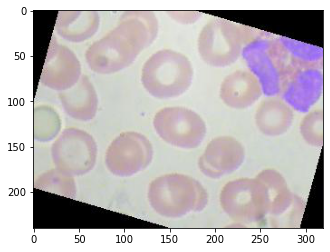

In [7]:
fpath=r'./content/dataset2-master/dataset2-master/images/TEST/EOSINOPHIL/_0_2634.jpeg'
img=plt.imread(fpath)
print (img.shape)
imshow(img)

In [8]:
class_names = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']#name of the classes
nb_classes = len(class_names)
image_size = (120,120)#size of image needed

In [9]:
Train_Data_Path = Path('./content/dataset2-master/dataset2-master/images/TRAIN/')
Test_Data_Path = Path('./content/dataset2-master/dataset2-master/images/TEST/')

In [10]:
Train_JPG_Path = list(Train_Data_Path.glob(r"**/*.jpeg"))
Test_JPG_Path = list(Test_Data_Path.glob(r"**/*.jpeg"))#changing it to list(.jpeg) path

In [11]:
Train_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Train_JPG_Path))
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))#defining the label values with the help of the folder name

In [12]:
Train_JPG_Path_Series = pd.Series(Train_JPG_Path,name="JPG").astype(str)
Train_JPG_Labels_Series = pd.Series(Train_JPG_Labels,name="CATEGORY").tolist()
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="CATEGORY").tolist()#converting all the values to series

In [13]:
def convertlabels(y):#converting label string to class value
    labels=[]
    for i in range (0,len(y)):
            if y[i]=="EOSINOPHIL": labels.append(0)#help of if else loop defining class values
            elif y[i]=="LYMPHOCYTE": labels.append(1)
            elif y[i]== "MONOCYTE": labels.append(2)
            else: labels.append(3)
    labels=np.array(labels)#conv of list to array
    return labels
def convertimage(path):#converting path to image
    images=[]
    for i in path:
        image = cv2.imread(i)#reading image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#converting BGR image to RGB
        image = cv2.resize(image, image_size)#resizing the input image acc to model input size
        images.append(image)#appending the 2d array
    return np.array(images)

In [14]:
X_train=convertimage(Train_JPG_Path_Series)#converting train path to train image
X_test=convertimage(Test_JPG_Path_Series)#converting test path to test image
Y_train=convertlabels(Train_JPG_Labels_Series)#converting train label string to class value
Y_test=convertlabels(Test_JPG_Labels_Series)#converting test label string to class value

In [15]:
X_train,Y_train=shuffle(X_train,Y_train,random_state=10)
X_test,Y_test=shuffle(X_test,Y_test,random_state=10)#shuffle the train and test values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')#converting it into float32
X_train /= 255
X_test /= 255#normalizing the values
print("X_train shape", X_train.shape)
print("y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)#printing all the dimensions
print("y_test shape", Y_test.shape)

X_train shape (9957, 120, 120, 3)
y_train shape (9957,)
X_test shape (2487, 120, 120, 3)
y_test shape (2487,)


## Model 

In [53]:

model = keras.models.Sequential()#defining a model
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(120,120, 3)))#adding convolutional layer
model.add(MaxPooling2D((2, 2)))#maxpooling the output of the previous layer with 2x2
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))#inorder prevent over fitting we are using drop out boxes
model.add(Conv2D(64, (3, 3), activation='relu'))#repeating the above process 3 times
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))#adding dense layers which helps to get us kernel which deals with seprating classes
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))#there are 4 classes to be seprated so here input is 4
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 118, 118, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 59, 59, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 57, 57, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 26, 26, 64)       

In [57]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])#compiling the model and informing to display accuracy metric

In [58]:
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))#fitting the model with the train data and validating

Epoch 1/20
312/312 [==============================] - 6s 17ms/step - loss: 0.6659 - accuracy: 0.7049 - val_loss: 0.6800 - val_accuracy: 0.7113
Epoch 2/20
312/312 [==============================] - 4s 13ms/step - loss: 0.5801 - accuracy: 0.7488 - val_loss: 0.6329 - val_accuracy: 0.7189
Epoch 3/20
312/312 [==============================] - 4s 13ms/step - loss: 0.5072 - accuracy: 0.7855 - val_loss: 0.7859 - val_accuracy: 0.7153
Epoch 4/20
312/312 [==============================] - 4s 13ms/step - loss: 0.4750 - accuracy: 0.7930 - val_loss: 0.6721 - val_accuracy: 0.7310
Epoch 5/20
312/312 [==============================] - 4s 13ms/step - loss: 0.4123 - accuracy: 0.8236 - val_loss: 0.7339 - val_accuracy: 0.7246
Epoch 6/20
312/312 [==============================] - 4s 13ms/step - loss: 0.3684 - accuracy: 0.8384 - val_loss: 0.6660 - val_accuracy: 0.7551
Epoch 7/20
312/312 [==============================] - 4s 13ms/step - loss: 0.3388 - accuracy: 0.8590 - val_loss: 0.6696 - val_accuracy: 0.7600

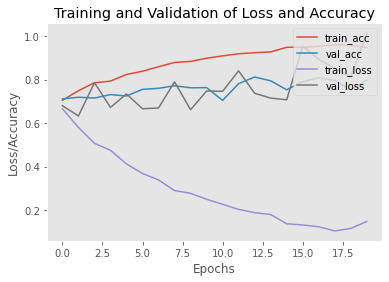

In [59]:
#Plotting the train accuracy
N = 20 # Number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.title("Training and Validation of Loss and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
plt.grid(False)

In [60]:
tf.keras.models.save_model(model,'q1modelg.hdf5') #saving the model

In [16]:
model = tf.keras.models.load_model('q1modelg.hdf5') #loading the model

In [17]:
# Evaluating the model on test and train data to finding the loss and accuracy
results = model.evaluate(X_test, Y_test)
# Accuracy and loss for test data
print("Loss of the model  while using  test datas ", results[0])
print("Accuracy of the model while using  test datas t", results[1]*100, "%")
results = model.evaluate(X_train, Y_train)
# Accuracy and loss for Train data
print("Loss of the model  while using  train datas  ", results[0])
print("Accuracy of the model while using  train datas ", results[1]*100, "%")

78/78 [==============================] - 3s 6ms/step - loss: 1.0130 - accuracy: 0.7973
Loss of the model  while using  test datas  1.0130400657653809
Accuracy of the model while using  test datas t 79.73461747169495 %
312/312 [==============================] - 2s 7ms/step - loss: 0.0441 - accuracy: 0.9945
Loss of the model  while using  train datas   0.04409489035606384
Accuracy of the model while using  train datas  99.44762587547302 %


In [18]:
predIdxs = model.predict(X_test)#predicting the label values
label = ["EOSINOPHIL","LYMPHOCYTE","MONOCYTE","NEUTROPHIL"]

from sklearn.metrics import classification_report
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(Y_test, predIdxs,target_names=label))#printing classification metrics

              precision    recall  f1-score   support

  EOSINOPHIL       0.72      0.70      0.71       623
  LYMPHOCYTE       0.99      1.00      0.99       620
    MONOCYTE       1.00      0.72      0.84       620
  NEUTROPHIL       0.60      0.78      0.68       624

    accuracy                           0.80      2487
   macro avg       0.83      0.80      0.80      2487
weighted avg       0.83      0.80      0.80      2487



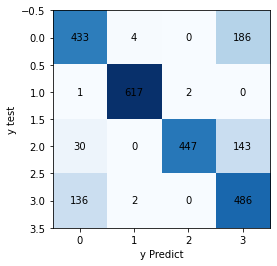

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, predIdxs)
# Plot confusion matrix
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("y Predict")
plt.ylabel("y test")
plt.grid(False)
plt.show()